In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [118]:
#Leyendo los datos de vinos
datos = np.loadtxt(open("wine.data","r"),delimiter=",",skiprows=0, dtype=np.float64)
print datos


[[1.00 14.23 1.71 ..., 1.04 3.92 1065.00]
 [1.00 13.20 1.78 ..., 1.05 3.40 1050.00]
 [1.00 13.16 2.36 ..., 1.03 3.17 1185.00]
 ..., 
 [3.00 13.27 4.28 ..., 0.59 1.56 835.00]
 [3.00 13.17 2.59 ..., 0.60 1.62 840.00]
 [3.00 14.13 4.10 ..., 0.61 1.60 560.00]]


In [119]:
# Se cargan los tipos de vinos
y_tipos_de_vino = datos[:,0]
# Se tienes los 14 atributos de los vinos
x_vino = datos[:,1:]
Numero_de_elementos = len(x_vino)

In [120]:
# Imprimiendo información relevante de los datos
print('Numero total de muestras (filas):', x_vino.shape[0])
print('Numero total de caracteristicas (columnas):', x_vino.shape[1])

('Numero total de muestras (filas):', 178)
('Numero total de caracteristicas (columnas):', 13)


In [121]:
# Imprimiendo el primer tipo de vino
float_formatter = lambda x: '{:.2f}'.format(x)
np.set_printoptions(formatter={'float_kind':float_formatter})
print('\nPrimera muestra (i.e., Primera fila:\nEtiqueta de la clase: {:d}\n{:}\n'
          .format(int(y_tipos_de_vino[0]), x_vino[0]))


Primera muestra (i.e., Primera fila:
Etiqueta de la clase: 1
[14.23 1.71 2.43 15.60 127.00 2.80 3.06 0.28 2.29 5.64 1.04 3.92 1065.00]



In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(x_vino, y_tipos_de_vino, test_size=.2)
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

## Kmeans

In [123]:
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from scipy import spatial

In [124]:
des = sum(spatial.distance.pdist(X_test)**2)/Numero_de_elementos
neto=[]

In [125]:
for i in range(1,20):
    cluster = KMeans(i)
    cluster = cluster.fit(X_train)
    distancias = cluster.transform(X_test)
    ag = 0
    for j in range(X_test.shape[0]):
        ag+=min(distancias[j,:])**2
    neto.append(abs(des-ag)/des*100)
x = range(1,20)
print neto

[414.09386111915694, 260.98303889515944, 187.63074250545068, 174.60812961113007, 174.97332774199452, 167.66446447543802, 156.60241435818574, 148.19184990393137, 153.4522221110216, 128.11981316650878, 136.81214799886337, 116.88461130977117, 123.87678546175864, 103.96431459975129, 116.4860105620883, 106.8852513383016, 98.142459429505166, 112.89832999909306, 104.75273869444351]


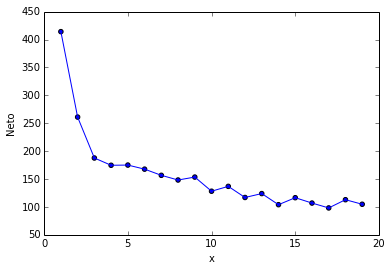

In [126]:
figure = plt.figure(1)
plt.plot(x , neto)
plt.scatter(x, neto)
plt.xlabel("x")
plt.ylabel("Neto")

## Random forest

In [127]:
#Tomado del ejemplo desarrolado en clase para Boston
from sklearn.ensemble import RandomForestClassifier

In [128]:
rf = RandomForestClassifier(n_estimators=4)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [129]:
total_arboles = 20
suma_cuadrado = np.zeros(total_arboles)
for j in range(total_arboles):
    rf = RandomForestClassifier(n_estimators=j+1)
    rf.fit(X_train[106:], Y_train[106:])
    Y_prediction = rf.predict(X_test)
    suma_cuadrado[j] = sum((Y_prediction - Y_train[106:])**2)

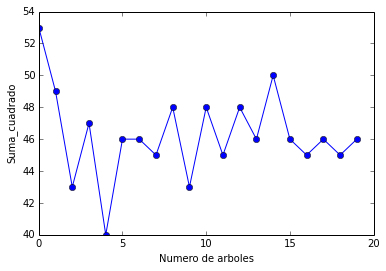

In [130]:
plt.plot(suma_cuadrado,"-o")
plt.xlabel("Numero de arboles")
plt.ylabel("Suma_cuadrado")

## PCA

In [131]:
from sklearn.decomposition import PCA

In [132]:
sklearn_pca = PCA(n_components=13)
sklearn_transf = sklearn_pca.fit_transform(X_train)
sklearn_pca.explained_variance_ratio_

array([0.35, 0.20, 0.11, 0.07, 0.07, 0.05, 0.04, 0.03, 0.02, 0.02, 0.02,
       0.01, 0.01])

In [133]:
from sklearn.decomposition import PCA
#Se define el número de componentes
sklearn_pca = PCA(n_components=13) 
sklearn_transf = sklearn_pca.fit_transform(X_train)
x_sklearn = sklearn_pca.fit_transform(X_train)

In [134]:
sklearn_pca = PCA(n_components= 13)
sklearn_transf = sklearn_pca.fit_transform(X_train)
Y = sklearn_pca.explained_variance_ratio_ 
C=[] 
actual=0
for k in Y:
    actual+=k
    C.append(actual)

In [135]:
print Y #(sklearn_pca.explained_variance_ratio)

[0.35 0.20 0.11 0.07 0.07 0.05 0.04 0.03 0.02 0.02 0.02 0.01 0.01]


In [136]:
suma=0
for k in range(len(Y)):
    suma+=Y[k]
    print "Numero de componentes",k+1, "Porcentaje de la varianza=",suma

Numero de componentes 1 Porcentaje de la varianza= 0.351279600169
Numero de componentes 2 Porcentaje de la varianza= 0.552827090704
Numero de componentes 3 Porcentaje de la varianza= 0.665506287793
Numero de componentes 4 Porcentaje de la varianza= 0.73666619068
Numero de componentes 5 Porcentaje de la varianza= 0.803210334743
Numero de componentes 6 Porcentaje de la varianza= 0.853172690416
Numero de componentes 7 Porcentaje de la varianza= 0.893906634734
Numero de componentes 8 Porcentaje de la varianza= 0.921935611839
Numero de componentes 9 Porcentaje de la varianza= 0.942948106316
Numero de componentes 10 Porcentaje de la varianza= 0.962613306489
Numero de componentes 11 Porcentaje de la varianza= 0.979639522681
Numero de componentes 12 Porcentaje de la varianza= 0.99168177007
Numero de componentes 13 Porcentaje de la varianza= 1.0


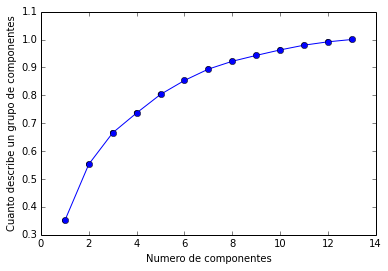

In [137]:
X = np.linspace(1.0, 13.0, num = 13)
plt.plot(X, C,"-o")
plt.scatter(X, C)
plt.xlabel("Numero de componentes")
plt.ylabel("Cuanto describe un grupo de componentes")

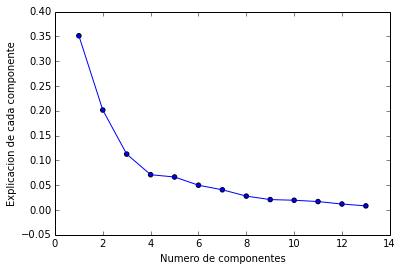

In [138]:
plt.plot(X, Y)
plt.scatter(X, Y)
plt.xlabel("Numero de componentes")
plt.ylabel("Explicacion de cada componente")